In [7]:
from __future__ import print_function, absolute_import

import ipywidgets as widgets
from IPython.display import display
import elastix
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import warnings

%matplotlib notebook

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Paths, Make sure the elastix folder etc. is included in your current working directory
paths = open(os.getcwd() + r"\\paths.txt").read().splitlines()
ELASTIX_PATH, TRANSFORMIX_PATH, DATA_PATH ,OUTPUT_DIR = paths

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

In [8]:
# Get patient names and select atlas patients
patient_list = [patient for patient in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, patient))]
atlas_patients = patient_list[:5]

# Get patient names and select atlas patients
patient_list = [patient for patient in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, patient))]
# print patient_list

print(patient_list)

for patient in atlas_patients:
    fixed_image_path = os.path.join(DATA_PATH, patient, 'mr_bffe.mhd')
    delineation_image_path = os.path.join(DATA_PATH, patient, 'prostaat.mhd')
    print(fixed_image_path)
    print(delineation_image_path)

['p102', 'p107', 'p108', 'p109', 'p115', 'p116', 'p117', 'p119', 'p120', 'p125', 'p127', 'p128', 'p129', 'p133', 'p135']
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p102\mr_bffe.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p102\prostaat.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p107\mr_bffe.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p107\prostaat.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p108\mr_bffe.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p108\prostaat.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 

In [ ]:
# Get patient names and select atlas patients
patient_list = [patient for patient in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, patient))]
atlas_patients = patient_list[:5]

# Get patient names and select atlas patients
patient_list = [patient for patient in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, patient))]
# print patient_list

print(patient_list)

for patient in atlas_patients:
    delineation_image_path = os.path.join(DATA_PATH, patient, 'prostaat.mhd')
    print(delineation_image_path)

['p102', 'p107', 'p108', 'p109', 'p115', 'p116', 'p117', 'p119', 'p120', 'p125', 'p127', 'p128', 'p129', 'p133', 'p135']
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p102\prostaat.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p107\prostaat.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p108\prostaat.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p109\prostaat.mhd
C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p115\prostaat.mhd


Assignment


In [3]:
import SimpleITK as sitk
import numpy as np

# Define the path to the segmentation .mhd file
mhd_file_path = r"C:\Users\20202047\OneDrive - TU Eindhoven\Master\Year 1\Q3\Capita selecta\Group project\DevelopmentData\DevelopmentData\p102\prostaat.mhd"

# Load the segmentation image
image = sitk.ReadImage(mhd_file_path)

# Convert the image to a NumPy array
image_array = sitk.GetArrayFromImage(image)

# Get voxel size from the image (voxel dimensions in mm)
voxel_size = image.GetSpacing()  # This returns (depth, height, width) spacing in mm
print(f"Voxel Size (mm): {voxel_size}")

# Initialize a list to store the number of white pixels (value 1) per slice
white_pixels_per_slice = []

# Loop through each slice (depth dimension)
for slice_idx in range(image_array.shape[0]):  # image_array.shape[0] gives the number of slices
    # Count the number of white pixels (value 1) in this slice
    white_pixels_count = np.sum(image_array[slice_idx] == 1)
    
    # Append the count to the list
    white_pixels_per_slice.append(white_pixels_count)

# Print the number of white pixels per slice
for idx, count in enumerate(white_pixels_per_slice):
    print(f"Slice {idx}: {count} white pixels")

# Sum the total number of white pixels across all slices
total_white_pixels = sum(white_pixels_per_slice)

# Calculate the volume of a single voxel in cubic millimeters (mm³)
voxel_volume_mm3 = np.prod(voxel_size)  # This multiplies depth * height * width

# Calculate the total volume in cubic millimeters (mm³)
total_volume_mm3 = total_white_pixels * voxel_volume_mm3

# Convert the volume to cubic centimeters (cm³)
total_volume_cm3 = total_volume_mm3 / 1000  # 1 cm³ = 1000 mm³

# Print the results
print(f"Total number of white pixels: {total_white_pixels}")
print(f"Total volume of white part: {total_volume_mm3} mm³")
print(f"Total volume of white part: {total_volume_cm3} cm³")



Voxel Size (mm): (0.488281, 0.488281, 1.0)
Slice 0: 0 white pixels
Slice 1: 0 white pixels
Slice 2: 0 white pixels
Slice 3: 0 white pixels
Slice 4: 0 white pixels
Slice 5: 0 white pixels
Slice 6: 0 white pixels
Slice 7: 0 white pixels
Slice 8: 0 white pixels
Slice 9: 0 white pixels
Slice 10: 0 white pixels
Slice 11: 0 white pixels
Slice 12: 0 white pixels
Slice 13: 0 white pixels
Slice 14: 0 white pixels
Slice 15: 0 white pixels
Slice 16: 0 white pixels
Slice 17: 0 white pixels
Slice 18: 113 white pixels
Slice 19: 392 white pixels
Slice 20: 1067 white pixels
Slice 21: 758 white pixels
Slice 22: 966 white pixels
Slice 23: 1208 white pixels
Slice 24: 1495 white pixels
Slice 25: 1675 white pixels
Slice 26: 1836 white pixels
Slice 27: 2113 white pixels
Slice 28: 2423 white pixels
Slice 29: 2539 white pixels
Slice 30: 2929 white pixels
Slice 31: 3173 white pixels
Slice 32: 3352 white pixels
Slice 33: 3522 white pixels
Slice 34: 3689 white pixels
Slice 35: 3833 white pixels
Slice 36: 4003 wh

In [3]:
from __future__ import print_function, absolute_import

import ipywidgets as widgets
from IPython.display import display
import elastix
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import warnings
import numpy as np

#%matplotlib notebook

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Paths, Make sure the elastix folder etc. is included in your current working directory
paths = open(os.getcwd() + r"\\paths.txt").read().splitlines()
ELASTIX_PATH, TRANSFORMIX_PATH, DATA_PATH ,OUTPUT_DIR = paths

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

# Get patient names and select atlas patients
patient_list = [patient for patient in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, patient))]
atlas_patients = patient_list[:15]

# Initialize a list to store the volumes for each patient
patient_volumes = {}

# Loop over each patient
for patient in atlas_patients:
    # Define the path to the segmentation .mhd file for the current patient
    delineation_image_path = os.path.join(DATA_PATH, patient, 'prostaat.mhd')
    
    # Load the segmentation image (delineation of prostate)
    image = sitk.ReadImage(delineation_image_path)
    
    # Convert the image to a NumPy array
    image_array = sitk.GetArrayFromImage(image)

    # Get voxel size from the image (voxel dimensions in mm)
    voxel_size = image.GetSpacing()  # This returns (depth, height, width) spacing in mm
    print(f"Voxel Size (mm): {voxel_size}")

    # Calculate the number of white pixels (value 1) in the segmentation
    white_pixels = np.sum(image_array == 1)  # Count of white pixels in this patient’s segmentation
    
    # Calculate the volume of a single voxel in cubic millimeters (mm³)
    voxel_volume_mm3 = np.prod(voxel_size)  # Depth * Height * Width

    # Calculate the total volume in cubic millimeters (mm³)
    total_volume_mm3 = white_pixels * voxel_volume_mm3

    # Convert the volume to cubic centimeters (cm³)
    total_volume_cm3 = total_volume_mm3 / 1000  # 1 cm³ = 1000 mm³

    # Store the calculated volume for this patient
    patient_volumes[patient] = total_volume_cm3

    # Optionally, print the result for each patient
    print(f"Patient {patient}: Volume = {total_volume_cm3:.3f} cm³")

# Print the final dictionary of patient volumes
print("\nAll Patient Volumes (cm³):")
for patient, volume in patient_volumes.items():
    print(f"{patient}: {volume:.3f} cm³")


Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p102: Volume = 51.602 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p107: Volume = 46.884 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p108: Volume = 135.524 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p109: Volume = 77.804 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p115: Volume = 40.254 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p116: Volume = 125.818 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p117: Volume = 46.301 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p119: Volume = 79.606 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p120: Volume = 79.759 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p125: Volume = 58.134 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p127: Volume = 49.998 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p128: Volume = 106.688 cm³
Voxel Size (mm): (0.488281, 0.488281, 1.0)
Patient p129: Volume = 162.163

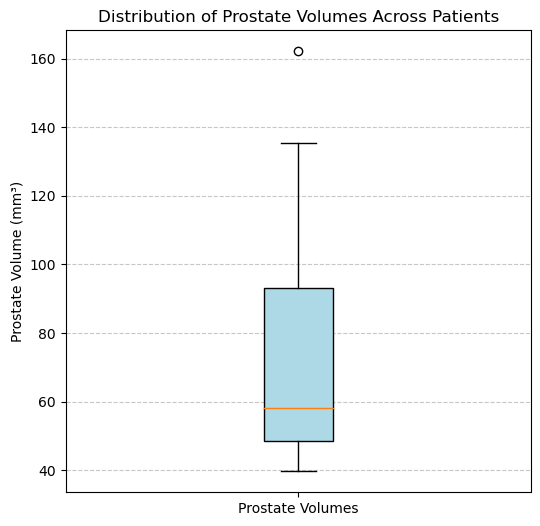

In [ ]:
# Extract volume values for box plot
volume_values = list(patient_volumes.values())  

# Create a Box Plot
plt.figure(figsize=(6, 6))
plt.boxplot(volume_values, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Customize the plot
plt.ylabel("Prostate Volume (cm³)")
plt.title("Distribution of Prostate Volumes Across Patients")
plt.xticks([1], ["Prostate Volumes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

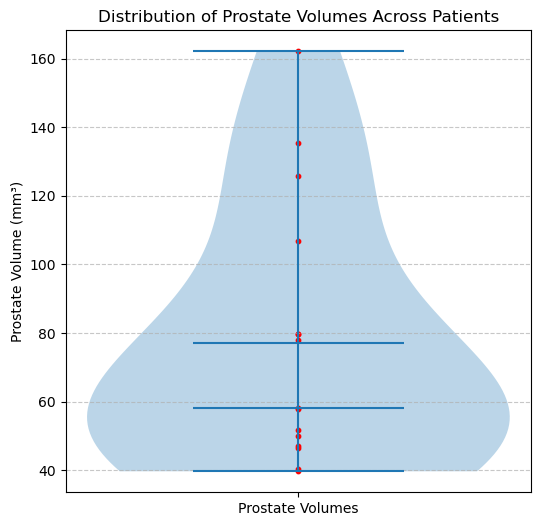

In [ ]:
# Extract volume values for box plot
volume_values = list(patient_volumes.values())  

# violin plot with datapoints
plt.figure(figsize=(6, 6))
plt.violinplot(volume_values, showmeans=True, showmedians=True)
plt.scatter(np.ones(len(volume_values)), volume_values, color='r', s=10)
plt.ylabel("Prostate Volume (cm³)")
plt.title("Distribution of Prostate Volumes Across Patients")
plt.xticks([1], ["Prostate Volumes"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
